# Data mining consulting

## Profesor: Daniel Alfredo Chávez Gallo
-------------------------------------------------------------------------------------------------------------------------

### Entender y preparar datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
pwd

'/home/diego/Documents/notebooks/dmc-advance-analytics'

In [4]:
df = pd.read_csv('/home/diego/Documents/notebooks/dmc-advance-analytics/data/Datos_mla_train_valid.csv',sep=',',encoding='latin-1')

In [5]:
df.shape

(23546, 254)

In [6]:
df.head(2)

,NUMPERIODO,CLIENTE,MED_NUMRENTABASICA,AVG_NUMRENTABASICA,STD_NUMRENTABASICA,MIN_NUMRENTABASICA,SUM_PENALIDAD,AVG_PENALIDAD,ANT_ADENDA_MAX,ANT_ADENDA,...,U_NUMTRAFICOFACEBOOK_M34.1,NUMTRAFICOMAILILIMITADO_U4M,U_NUMTRAFICOFACEBOOK_U4M,MAX_NUMMINUTOSENTRANTE.1,MAX_NUMTRAFICOMAILILIMITADO_U3.1,U_NUMMINSALIENTEOFFNET_U2M.1,NUMTRAFICOMAILILIMITADO_4M.1,STD_NUMMINSALIENTEOFFNET_U3M,MAX_NUMTRAFICOMAILILIMITADO_U5.1,TARGET
0,201801,ID_0002,41.5254,51.885675,29.684102,24.5763,12514.12,208.568667,12,"[0, 12]",...,0.0,2600.552901,231.91463,0.055363,0.011838,0.014749,0.0,2309.150146,0.011838,0
1,201801,ID_0004,25.4200,20.187253,6.316563,12.7119,19934.58,553.738333,4,"[0, 12]",...,0.0,2175.860710,84.16041,0.040819,0.009915,0.009907,0.0,1432.617790,0.009915,0


In [7]:
train = df[(df['NUMPERIODO']>=201801) & (df['NUMPERIODO']<=201901)]

In [8]:
train.shape

(21821, 254)

In [9]:
test = df[df['NUMPERIODO']==201902]

In [10]:
test.shape

(1725, 254)

In [10]:
train['FLG_SUSP_DIAS_AVG'] = train['SUSP_DIAS_AVG'].map(lambda x: 1 if x>0 else 0)
train['FLG_SUSP_MESES_AVG'] = train['SUSP_MESES_AVG'].map(lambda x: 1 if x>0 else 0)
train['FLG_VEP'] = train['VEP'].map(lambda x: 1 if x>0 else 0)

In [11]:
train["FLG_SUSP_MESES_AVG"].astype(str).unique(), train["FLG_SUSP_MESES_AVG"].astype(str).describe()

(array(['0', '1'], dtype=object),
 count     21821
 unique        2
 top           0
 freq      15178
 Name: FLG_SUSP_MESES_AVG, dtype: object)

In [13]:
#estadística descriptiva
train.describe()

,NUMPERIODO,MED_NUMRENTABASICA,AVG_NUMRENTABASICA,STD_NUMRENTABASICA,MIN_NUMRENTABASICA,SUM_PENALIDAD,AVG_PENALIDAD,ANT_ADENDA_MAX,ANT_CONTR_MIN,ANT_TOTAL_AVG,...,MAX_NUMMINUTOSENTRANTE.1,MAX_NUMTRAFICOMAILILIMITADO_U3.1,U_NUMMINSALIENTEOFFNET_U2M.1,NUMTRAFICOMAILILIMITADO_4M.1,STD_NUMMINSALIENTEOFFNET_U3M,MAX_NUMTRAFICOMAILILIMITADO_U5.1,TARGET,FLG_SUSP_DIAS_AVG,FLG_SUSP_MESES_AVG,FLG_VEP
count,21821.000000,21821.000000,21821.000000,21821.000000,21821.000000,21821.000000,21821.000000,21821.000000,21821.000000,21821.000000,...,21821.000000,21821.000000,21821.000000,21821.000000,21821.000000,21821.000000,21821.000000,21821.000000,21821.000000,21821.000000
mean,201814.139361,45.454559,53.217805,25.026058,27.071453,22344.896498,434.244562,9.925118,7.386600,12.321472,...,0.045401,0.029796,0.023763,0.016083,2936.049077,0.032253,0.066725,0.306173,0.304432,0.769992
std,25.857096,23.651473,20.818256,14.948364,9.146913,26344.402230,410.137753,6.017198,8.325352,7.476640,...,0.024844,0.027316,0.018428,0.021583,2231.984144,0.029192,0.249550,0.460913,0.460177,0.420847
min,201801.000000,5.932000,8.305000,0.000000,5.932000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201804.000000,26.695000,38.005170,14.338840,25.423760,2899.380000,127.319604,5.000000,1.000000,7.000000,...,0.029016,0.009666,0.010754,0.000000,1361.470000,0.010886,0.000000,0.000000,0.000000,1.000000
50%,201807.000000,38.898000,49.249152,24.639120,26.694920,12514.570000,328.733200,11.000000,5.000000,11.370000,...,0.041774,0.022285,0.019621,0.006979,2449.374000,0.024199,0.000000,0.000000,0.000000,1.000000
75%,201810.000000,54.237290,64.016580,35.153070,32.627000,32121.640000,620.162900,15.000000,11.000000,16.034390,...,0.057610,0.041413,0.032491,0.024899,4016.777000,0.044985,0.000000,1.000000,1.000000,1.000000
max,201901.000000,135.508500,141.101700,88.752410,55.847000,131317.560000,2183.825000,45.000000,41.000000,43.482190,...,0.146595,0.142233,0.101475,0.109499,12441.330000,0.154457,1.000000,1.000000,1.000000,1.000000


In [14]:
train.dtypes

NUMPERIODO                            int64
CLIENTE                              object
MED_NUMRENTABASICA                  float64
AVG_NUMRENTABASICA                  float64
STD_NUMRENTABASICA                  float64
MIN_NUMRENTABASICA                  float64
SUM_PENALIDAD                       float64
AVG_PENALIDAD                       float64
ANT_ADENDA_MAX                        int64
ANT_ADENDA                           object
ANT_CONTR_MIN                         int64
ANT_TOTAL_AVG                       float64
ANT_LANZA_MIN                         int64
MAX_PANTALLA                        float64
SUM_NUM_INCIDENCIAS                   int64
AVG_NUM_INCIDENCIAS                 float64
STD_NUM_INCIDENCIAS                 float64
IND_INCIDENCIAS                     float64
MONTO_DEUDACLIENTE_AVG              float64
SUSP_DIAS_AVG                       float64
SUSP_MESES_AVG                      float64
VEP                                 float64
AVG_VEP                         

In [15]:
#conteo de nulos
train.isnull().sum()/train.shape[0]*100

NUMPERIODO                          0.0
CLIENTE                             0.0
MED_NUMRENTABASICA                  0.0
AVG_NUMRENTABASICA                  0.0
STD_NUMRENTABASICA                  0.0
MIN_NUMRENTABASICA                  0.0
SUM_PENALIDAD                       0.0
AVG_PENALIDAD                       0.0
ANT_ADENDA_MAX                      0.0
ANT_ADENDA                          0.0
ANT_CONTR_MIN                       0.0
ANT_TOTAL_AVG                       0.0
ANT_LANZA_MIN                       0.0
MAX_PANTALLA                        0.0
SUM_NUM_INCIDENCIAS                 0.0
AVG_NUM_INCIDENCIAS                 0.0
STD_NUM_INCIDENCIAS                 0.0
IND_INCIDENCIAS                     0.0
MONTO_DEUDACLIENTE_AVG              0.0
SUSP_DIAS_AVG                       0.0
SUSP_MESES_AVG                      0.0
VEP                                 0.0
AVG_VEP                             0.0
MIN_VEP                             0.0
MAX_VEP                             0.0


In [16]:
#conteo de ceros
(train==0).sum()/train.shape[0]*100

NUMPERIODO                           0.000000
CLIENTE                              0.000000
MED_NUMRENTABASICA                   0.000000
AVG_NUMRENTABASICA                   0.000000
STD_NUMRENTABASICA                   7.103249
MIN_NUMRENTABASICA                   0.000000
SUM_PENALIDAD                        9.105907
AVG_PENALIDAD                        9.060080
ANT_ADENDA_MAX                      10.897759
ANT_ADENDA                           0.000000
ANT_CONTR_MIN                       15.430090
ANT_TOTAL_AVG                        0.384950
ANT_LANZA_MIN                        1.008203
MAX_PANTALLA                         0.000000
SUM_NUM_INCIDENCIAS                  0.417029
AVG_NUM_INCIDENCIAS                  0.000000
STD_NUM_INCIDENCIAS                  2.566335
IND_INCIDENCIAS                      0.412447
MONTO_DEUDACLIENTE_AVG               0.013748
SUSP_DIAS_AVG                       69.382705
SUSP_MESES_AVG                      69.556849
VEP                               

#### Variables Numericas

In [17]:
var = train.columns

In [18]:
train['NUMPERIODO'] = train['NUMPERIODO'].astype(str)
train['CLIENTE'] = train['CLIENTE'].astype(str)
train['TARGET'] = train['TARGET'].astype(str)

In [19]:
#características numéricas
features_num = list(train[var].select_dtypes(include=[float, int, np.int64, np.float64]).columns)
features_num

['MED_NUMRENTABASICA',
 'AVG_NUMRENTABASICA',
 'STD_NUMRENTABASICA',
 'MIN_NUMRENTABASICA',
 'SUM_PENALIDAD',
 'AVG_PENALIDAD',
 'ANT_ADENDA_MAX',
 'ANT_CONTR_MIN',
 'ANT_TOTAL_AVG',
 'ANT_LANZA_MIN',
 'MAX_PANTALLA',
 'SUM_NUM_INCIDENCIAS',
 'AVG_NUM_INCIDENCIAS',
 'STD_NUM_INCIDENCIAS',
 'IND_INCIDENCIAS',
 'MONTO_DEUDACLIENTE_AVG',
 'SUSP_DIAS_AVG',
 'SUSP_MESES_AVG',
 'VEP',
 'AVG_VEP',
 'MIN_VEP',
 'MAX_VEP',
 'SUM_NUMTRAFICOFACEBOOK',
 'SUM_NUMTRAFICOINSTAGRAM',
 'SUM_NUMTRAFICOMAILILIMITADO',
 'AVG_NUMMINENTRANTEOFFNET',
 'AVG_NUMMINSALIENTEONNET',
 'MAX_NUMMINENTRANTEOFFNET',
 'MAX_NUMMINSALIENTEONNET',
 'MAX_NUMMINUTOSENTRANTE',
 'MAX_NUMTRAFICOFACEBOOK',
 'MAX_NUMTRAFICOYOUTUBE',
 'MAX_NUMTRAFICOINSTAGRAM',
 'MEDIAN_NUMTRAFICOMAILILIMITADO',
 'STDDEV_NUMMINENTRANTEOFFNET',
 'STDDEV_NUMMINSALIENTEONNET',
 'STDDEV_NUMMINUTOSALIENTE',
 'STDDEV_NUMTRAFICOFACEBOOK',
 'STDDEV_NUMTRAFICOYOUTUBE',
 'STDDEV_NUMTRAFICOINSTAGRAM',
 'NUMMINSALIENTEONNET_U5M.1',
 'STD_NUMMINENTRANTEONNET_

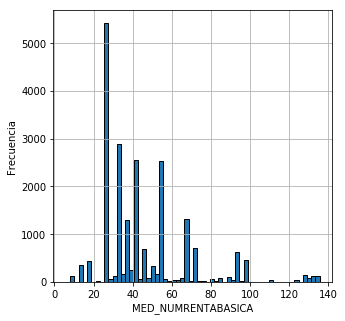

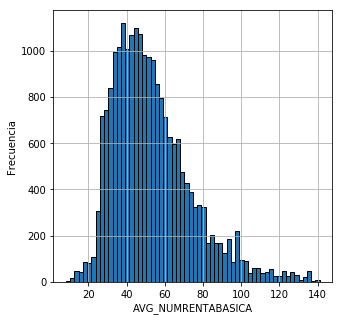

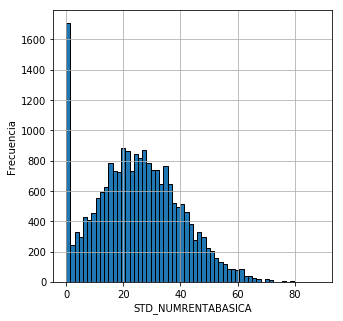

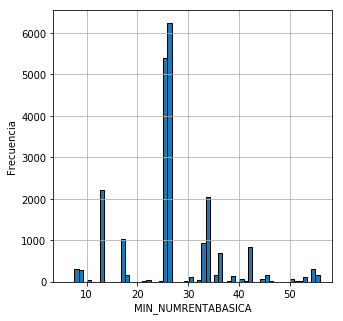

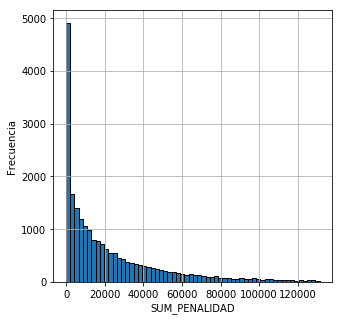

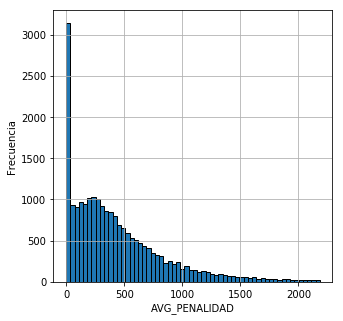

KeyboardInterrupt: 

In [108]:
import matplotlib.pyplot as plt
for feature in features_num:
    train[feature].hist(bins=60, figsize=(5,5), alpha=1, edgecolor = 'black',  linewidth=1)
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()
    plt.clf()

#### Variables categoricas

In [20]:
features_cat = list(train[var].select_dtypes(include=[np.object]).columns)
features_cat

['NUMPERIODO', 'CLIENTE', 'ANT_ADENDA', 'TARGET']

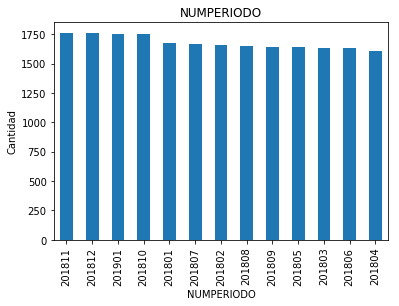

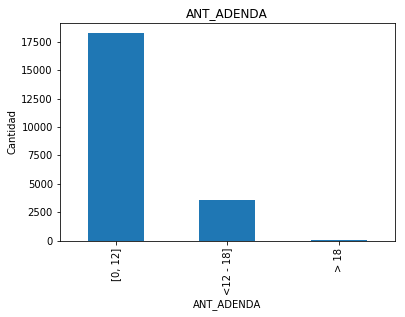

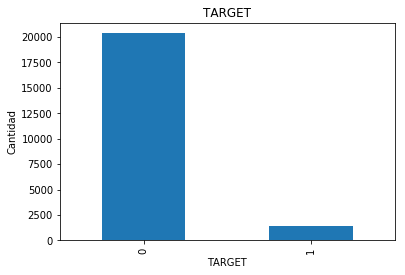

In [21]:
for feature in ['NUMPERIODO','ANT_ADENDA', 'TARGET']:
    var = train.groupby(feature)[feature].count().sort_values(ascending = False)
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Cantidad')
    ax1.set_title(feature)
    var.plot(kind='bar')
    plt.show()

In [22]:
# Una funcion que nos permita hacer dummies
def creardummies(df, var):
    dummy = pd.get_dummies(df[var], prefix = var)
    df = df.drop(var, axis = 1)
    df = pd.concat([df, dummy], axis = 1)
    return df

In [23]:
train = creardummies(train, 'ANT_ADENDA')

In [24]:
train.dtypes

NUMPERIODO                           object
CLIENTE                              object
MED_NUMRENTABASICA                  float64
AVG_NUMRENTABASICA                  float64
STD_NUMRENTABASICA                  float64
MIN_NUMRENTABASICA                  float64
SUM_PENALIDAD                       float64
AVG_PENALIDAD                       float64
ANT_ADENDA_MAX                        int64
ANT_CONTR_MIN                         int64
ANT_TOTAL_AVG                       float64
ANT_LANZA_MIN                         int64
MAX_PANTALLA                        float64
SUM_NUM_INCIDENCIAS                   int64
AVG_NUM_INCIDENCIAS                 float64
STD_NUM_INCIDENCIAS                 float64
IND_INCIDENCIAS                     float64
MONTO_DEUDACLIENTE_AVG              float64
SUSP_DIAS_AVG                       float64
SUSP_MESES_AVG                      float64
VEP                                 float64
AVG_VEP                             float64
MIN_VEP                         

### Partición de base

In [25]:
#características numéricas
var = train.columns
features_num = list(train[var].select_dtypes(include=[float, int, np.int64, np.float64, np.uint8]).columns)
features_num

['MED_NUMRENTABASICA',
 'AVG_NUMRENTABASICA',
 'STD_NUMRENTABASICA',
 'MIN_NUMRENTABASICA',
 'SUM_PENALIDAD',
 'AVG_PENALIDAD',
 'ANT_ADENDA_MAX',
 'ANT_CONTR_MIN',
 'ANT_TOTAL_AVG',
 'ANT_LANZA_MIN',
 'MAX_PANTALLA',
 'SUM_NUM_INCIDENCIAS',
 'AVG_NUM_INCIDENCIAS',
 'STD_NUM_INCIDENCIAS',
 'IND_INCIDENCIAS',
 'MONTO_DEUDACLIENTE_AVG',
 'SUSP_DIAS_AVG',
 'SUSP_MESES_AVG',
 'VEP',
 'AVG_VEP',
 'MIN_VEP',
 'MAX_VEP',
 'SUM_NUMTRAFICOFACEBOOK',
 'SUM_NUMTRAFICOINSTAGRAM',
 'SUM_NUMTRAFICOMAILILIMITADO',
 'AVG_NUMMINENTRANTEOFFNET',
 'AVG_NUMMINSALIENTEONNET',
 'MAX_NUMMINENTRANTEOFFNET',
 'MAX_NUMMINSALIENTEONNET',
 'MAX_NUMMINUTOSENTRANTE',
 'MAX_NUMTRAFICOFACEBOOK',
 'MAX_NUMTRAFICOYOUTUBE',
 'MAX_NUMTRAFICOINSTAGRAM',
 'MEDIAN_NUMTRAFICOMAILILIMITADO',
 'STDDEV_NUMMINENTRANTEOFFNET',
 'STDDEV_NUMMINSALIENTEONNET',
 'STDDEV_NUMMINUTOSALIENTE',
 'STDDEV_NUMTRAFICOFACEBOOK',
 'STDDEV_NUMTRAFICOYOUTUBE',
 'STDDEV_NUMTRAFICOINSTAGRAM',
 'NUMMINSALIENTEONNET_U5M.1',
 'STD_NUMMINENTRANTEONNET_

In [26]:
data_train = train[(train['NUMPERIODO']=='201801')|
                       (train['NUMPERIODO']=='201803')|
                       (train['NUMPERIODO']=='201805')|
                       (train['NUMPERIODO']=='201807')|
                       (train['NUMPERIODO']=='201809')|
                       (train['NUMPERIODO']=='201811')|
                       (train['NUMPERIODO']=='201901')]

In [27]:
data_valid = train[(train['NUMPERIODO']=='201802')|
                       (train['NUMPERIODO']=='201804')|
                       (train['NUMPERIODO']=='201806')|
                       (train['NUMPERIODO']=='201808')|
                       (train['NUMPERIODO']=='201810')|
                       (train['NUMPERIODO']=='201812')]

In [28]:
data_train.head()

,NUMPERIODO,CLIENTE,MED_NUMRENTABASICA,AVG_NUMRENTABASICA,STD_NUMRENTABASICA,MIN_NUMRENTABASICA,SUM_PENALIDAD,AVG_PENALIDAD,ANT_ADENDA_MAX,ANT_CONTR_MIN,...,NUMTRAFICOMAILILIMITADO_4M.1,STD_NUMMINSALIENTEOFFNET_U3M,MAX_NUMTRAFICOMAILILIMITADO_U5.1,TARGET,FLG_SUSP_DIAS_AVG,FLG_SUSP_MESES_AVG,FLG_VEP,ANT_ADENDA_<12 - 18],ANT_ADENDA_> 18,"ANT_ADENDA_[0, 12]"
0,201801,ID_0002,41.5254,51.885675,29.684102,24.5763,12514.12,208.568667,12,9,...,0.0,2309.150146,0.011838,0,0,0,1,0,0,1
1,201801,ID_0004,25.4200,20.187253,6.316563,12.7119,19934.58,553.738333,4,4,...,0.0,1432.617790,0.009915,0,0,0,0,0,0,1
2,201801,ID_0005,33.9000,59.886430,54.771079,13.0509,121690.87,760.567937,11,1,...,0.0,2981.869943,0.044831,0,1,1,0,0,0,1
3,201801,ID_0011,25.4200,45.105171,27.195161,25.4200,30739.62,304.352673,10,1,...,0.0,3011.588779,0.043739,0,0,0,1,0,0,1
4,201801,ID_0015,50.8500,72.474474,45.189967,25.4200,48228.27,1507.133438,16,8,...,0.0,1876.722953,0.008067,0,1,1,0,0,0,1


In [29]:
data_valid.head()

,NUMPERIODO,CLIENTE,MED_NUMRENTABASICA,AVG_NUMRENTABASICA,STD_NUMRENTABASICA,MIN_NUMRENTABASICA,SUM_PENALIDAD,AVG_PENALIDAD,ANT_ADENDA_MAX,ANT_CONTR_MIN,...,NUMTRAFICOMAILILIMITADO_4M.1,STD_NUMMINSALIENTEOFFNET_U3M,MAX_NUMTRAFICOMAILILIMITADO_U5.1,TARGET,FLG_SUSP_DIAS_AVG,FLG_SUSP_MESES_AVG,FLG_VEP,ANT_ADENDA_<12 - 18],ANT_ADENDA_> 18,"ANT_ADENDA_[0, 12]"
1272,201802,ID_0001,55.084746,72.009693,35.063491,25.423757,6223.27,1519.191333,0,0,...,0.0,3290.965666,0.067708,0,0,0,1,0,0,1
1273,201802,ID_0002,41.525400,53.194469,29.158939,26.271187,11386.12,189.768667,13,10,...,0.0,2793.201685,0.011838,0,0,0,1,0,0,1
1274,201802,ID_0003,36.440678,58.550908,36.456560,36.440678,48405.50,366.708333,9,23,...,0.0,4016.598005,0.025178,0,0,0,0,0,0,1
1275,201802,ID_0004,26.694916,20.937204,6.950260,12.711900,18637.82,517.717222,5,5,...,0.0,1899.395127,0.009915,0,0,0,0,0,0,1
1276,201802,ID_0008,67.796611,76.957333,60.816651,8.305100,39390.97,222.547853,15,3,...,0.0,7695.049455,0.072975,0,1,1,0,1,0,0


#### Creación de dataset y target

In [30]:
#características y target
X = data_train[features_num]
y = data_train['TARGET']

In [31]:
X.head()

,MED_NUMRENTABASICA,AVG_NUMRENTABASICA,STD_NUMRENTABASICA,MIN_NUMRENTABASICA,SUM_PENALIDAD,AVG_PENALIDAD,ANT_ADENDA_MAX,ANT_CONTR_MIN,ANT_TOTAL_AVG,ANT_LANZA_MIN,...,U_NUMMINSALIENTEOFFNET_U2M.1,NUMTRAFICOMAILILIMITADO_4M.1,STD_NUMMINSALIENTEOFFNET_U3M,MAX_NUMTRAFICOMAILILIMITADO_U5.1,FLG_SUSP_DIAS_AVG,FLG_SUSP_MESES_AVG,FLG_VEP,ANT_ADENDA_<12 - 18],ANT_ADENDA_> 18,"ANT_ADENDA_[0, 12]"
0,41.5254,51.885675,29.684102,24.5763,12514.12,208.568667,12,9,22.582316,4,...,0.014749,0.0,2309.150146,0.011838,0,0,1,0,0,1
1,25.4200,20.187253,6.316563,12.7119,19934.58,553.738333,4,4,4.000000,8,...,0.009907,0.0,1432.617790,0.009915,0,0,0,0,0,1
2,33.9000,59.886430,54.771079,13.0509,121690.87,760.567937,11,1,9.921180,2,...,0.019005,0.0,2981.869943,0.044831,1,1,0,0,0,1
3,25.4200,45.105171,27.195161,25.4200,30739.62,304.352673,10,1,7.652296,13,...,0.019192,0.0,3011.588779,0.043739,0,0,1,0,0,1
4,50.8500,72.474474,45.189967,25.4200,48228.27,1507.133438,16,8,17.274342,3,...,0.012003,0.0,1876.722953,0.008067,1,1,0,0,0,1


In [32]:
y.astype(str).describe(), y.unique()

(count     11765
 unique        2
 top           0
 freq      10993
 Name: TARGET, dtype: object, array(['0', '1'], dtype=object))

In [33]:
sum(y=='0')/len(y)

0.9343816404589885

In [34]:
sum(y=='1')/len(y)

0.06561835954101147

In [35]:
X_train = X.copy()
y_train = y.copy()
len(X), len(y)

(11765, 11765)

### Seleccion de Variables

#### RandomForestClassifier

In [36]:
seeds = np.arange(1,50,5)
seeds

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])

In [37]:
from time import time
time_star = time()

temp = pd.DataFrame({'atributo':list(X_train.columns)})

from sklearn.ensemble import RandomForestClassifier

for seed in seeds:
    clf = RandomForestClassifier(n_estimators=100,random_state=seed)
    clf = clf.fit(X_train, y_train)
    semilla = 'semilla_' + str(seed)
    temp[semilla]=clf.feature_importances_
    temp['importancia'] = temp.iloc[:,1:].apply(np.mean, axis=1)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  3.46  minutes


In [38]:
ranking_features = temp[['atributo','importancia']].sort_values('importancia', ascending = False).reset_index(drop = True)
ranking_features.head(20)

,atributo,importancia
0,AVG_NUM_INCIDENCIAS.1,0.012553
1,AVG_NUM_INCIDENCIAS,0.012531
2,IND_INCIDENCIAS,0.011694
3,STD_NUM_INCIDENCIAS,0.009181
4,SUM_NUM_INCIDENCIAS.1,0.008545
5,AVG_PENALIDAD,0.008428
6,SUM_NUM_INCIDENCIAS,0.007921
7,AVG_PENALIDAD.1,0.007708
8,ANT_TOTAL_AVG,0.007170
9,ANT_ADENDA_AVG.1,0.006955


In [39]:
def get_not_duplicated_features(data, n):
    """
    Función que retorna 'n' variables importantes sin considerar sus equivalentes transformados, considerando el 
    orden de importancia.
    Parámetros:
        data: Data de los atributos ordenado descendentemente por importancia.
        n: Cantidad de atributos finales según su importancia.
    """
    # Obteniendo los atributos en lista
    
    data = data.sort_values("importancia", ascending=False)    
    variables = data['atributo'].to_list()
    
    # Lógica para obtener los valores sin considerar el . en el nombre
    new_variables = []
    for variable in variables:
        if '.' in variable:
            new_variables.append(variable.split('.')[0])
        else:
            new_variables.append(variable)
            
    # Obteniendo los duplicados. Como está en orden, podemos decir que los últimos duplicados son los que debemos eliminar.
    idx = pd.Index(new_variables)
    not_duplicated = [not i for i in idx.duplicated()]  
    
    
    return data[not_duplicated].head(n)

In [40]:
ranking_features2 = get_not_duplicated_features(ranking_features, 50)

In [210]:
ranking_features2.to_csv('Importancia.csv',sep='|',index=False)

In [41]:
ranking_features2

,atributo,importancia
0,AVG_NUM_INCIDENCIAS.1,0.012553
2,IND_INCIDENCIAS,0.011694
3,STD_NUM_INCIDENCIAS,0.009181
4,SUM_NUM_INCIDENCIAS.1,0.008545
5,AVG_PENALIDAD,0.008428
8,ANT_TOTAL_AVG,0.007170
9,ANT_ADENDA_AVG.1,0.006955
10,MIN_VEP,0.006774
12,AVG_NUMRENTABASICA,0.006521
13,SUM_PENALIDAD,0.006272


### Modelos Supervisados de clasificación

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from patsy import dmatrices
from sklearn.externals.six import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score

In [43]:
features_f = list(ranking_features2['atributo'])
features_f

['AVG_NUM_INCIDENCIAS.1',
 'IND_INCIDENCIAS',
 'STD_NUM_INCIDENCIAS',
 'SUM_NUM_INCIDENCIAS.1',
 'AVG_PENALIDAD',
 'ANT_TOTAL_AVG',
 'ANT_ADENDA_AVG.1',
 'MIN_VEP',
 'AVG_NUMRENTABASICA',
 'SUM_PENALIDAD',
 'AVG_NUMMINENTRANTEOFFNET.1',
 'STD_NUMRENTABASICA',
 'MAX_VEP',
 'STDDEV_NUMMINENTRANTEOFFNET',
 'AVG_VEP.1',
 'MONTO_DEUDACLIENTE_AVG.1',
 'AVG_NUMTRAFICOMAILILIMITADO.1',
 'MAX_NUMMINENTRANTEOFFNET',
 'VEP',
 'ANT_ADENDA_MAX',
 'MAX_NUMMINSALIENTEONNET',
 'AVG_NUMMINSALIENTEONNET',
 'U_NUMTRAFICOPAGADO_U2M.1',
 'U_NUMMINSALIENTEOFFNET_U2M',
 'U_NUMTRAFICOPAGADO_U3M.1',
 'STDDEV_NUMMINSALIENTEONNET.1',
 'U_NUMTRAFICOTOTAL_U2M.1',
 'MAX_NUMMINUTOSENTRANTE',
 'MED_NUMRENTABASICA',
 'STDDEV_NUMMINUTOSALIENTE',
 'AVG_NUMTRAFICOFACEBOOK.1',
 'U_NUMMINENTRANTEONNET_U2M',
 'NUMTRAFICOMAILILIMITADO_U4M.1',
 'STDDEV_NUMTRAFICOFACEBOOK',
 'MAX_NUMTRAFICOMAILILIMITADO_U4.1',
 'MAX_NUMTRAFICOINSTAGRAM',
 'MIN_NUMRENTABASICA',
 'MEDIAN_NUMMINSALIENTEONNET.1',
 'NUMMINSALIENTEONNET_U5M.1',
 'U_

In [44]:
X_selection = X_train[features_f]
y_selection = y_train.copy()

In [45]:
X_selection.shape

(11765, 50)

In [46]:
y_selection.shape

(11765,)

#### Balanceo Smote

In [47]:
from time import time
time_star = time()

from imblearn.over_sampling import SMOTE

smote = SMOTE('not minority')
X_balanced, y_balanced = smote.fit_sample(X_selection, y_selection)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  0.0  minutes


In [48]:
len(X_balanced), len(y_balanced)

(11765, 11765)

In [49]:
X_balanced = X_selection.copy()
y_balanced = y_selection.copy()

#### Random Forest y GridSearch

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
X_balanced.shape

(11765, 50)

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': np.arange(10, 500 + 1, 100),
    'min_samples_leaf':[10],#np.arange(5, 25, 5),
    'max_features': np.arange(5, 50 + 1, 3)
}

clf_rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid, scoring='roc_auc', cv = 2, n_jobs = -1, verbose = 2)

In [53]:
from time import time
time_star = time()

grid_search.fit(X_balanced, y_balanced)
grid_search.best_params_

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Fitting 2 folds for each of 80 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 15.9min finished


Time:  16.35  minutes


In [54]:
grid_search.best_params_#parametros

{'max_features': 17, 'min_samples_leaf': 10, 'n_estimators': 210}

In [55]:
best_grid = grid_search.best_estimator_#modelo

In [56]:
# Guardar el modelo
import pickle
pickle.dump(best_grid, open('model_dmc.sav', 'wb'))

In [57]:
y_pred_train = best_grid.predict(data_train[features_f])
y_pred_train

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [58]:
y_prob_train = best_grid.predict_proba(data_train[features_f])
y_prob_train

array([[0.97542414, 0.02457586],
       [0.89365486, 0.10634514],
       [0.93983338, 0.06016662],
       ...,
       [0.92184785, 0.07815215],
       [0.91685835, 0.08314165],
       [0.94819495, 0.05180505]])

In [68]:
from sklearn import metrics
cm = metrics.confusion_matrix(data_train['TARGET'].astype(int), y_pred_train.astype(int))
accuracy = metrics.accuracy_score(data_train['TARGET'].astype(int), y_pred_train.astype(int))
roc_auc = metrics.roc_auc_score(data_train['TARGET'].astype(int), y_pred_train.astype(int))
print(cm)
print("accuracy = " + str(accuracy))
print("roc_auc = " + str(roc_auc))

[[10993     0]
 [  704    68]]
accuracy = 0.9401614959626009
roc_auc = 0.5440414507772021


In [79]:
y_pred_valid = best_grid.predict(data_valid[features_f])
y_pred_valid

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [80]:
y_prob_valid = best_grid.predict_proba(data_valid[features_f])
y_prob_valid

array([[0.97045881, 0.02954119],
       [0.97748782, 0.02251218],
       [0.86418395, 0.13581605],
       ...,
       [0.94857132, 0.05142868],
       [0.96211841, 0.03788159],
       [0.83844315, 0.16155685]])

In [83]:
from sklearn import metrics
cm = metrics.confusion_matrix(data_valid['TARGET'].astype(int), y_pred_valid.astype(int))
accuracy = metrics.accuracy_score(data_valid['TARGET'].astype(int), y_pred_valid.astype(int))
roc_auc = metrics.roc_auc_score(data_valid['TARGET'].astype(int), y_pred_valid.astype(int))
print(cm)
print("accuracy = " + str(accuracy))
print("roc_auc = " + str(roc_auc))

[[9370    2]
 [ 646   38]]
accuracy = 0.9355608591885441
roc_auc = 0.5276710769668517


#### Evaluacion por mes

In [88]:
# Para train
periodos_train = list(data_train['NUMPERIODO'].unique())
periodos_train

['201801', '201803', '201805', '201807', '201809', '201811', '201901']

In [89]:
for per in periodos_train:
    y_pred_train = best_grid.predict(data_train[data_train['NUMPERIODO']==per][features_f])
    roc_auc = metrics.roc_auc_score(data_train[data_train['NUMPERIODO']==per]['TARGET'], y_pred_train.astype(int))
    print(per, roc_auc)

201801 0.5411764705882353
201803 0.5344827586206896
201805 0.5208333333333334
201807 0.5465116279069767
201809 0.5654205607476636
201811 0.5615384615384615
201901 0.532608695652174


In [90]:
# Para validacion
periodos_valid = list(data_valid['NUMPERIODO'].unique())
periodos_valid

['201802', '201804', '201806', '201808', '201810', '201812']

In [91]:
for per in periodos_valid:
    y_pred_valid = best_grid.predict(data_valid[data_valid['NUMPERIODO']==per][features_f])
    roc_auc = metrics.roc_auc_score(data_valid[data_valid['NUMPERIODO']==per]['TARGET'], y_pred_valid.astype(int))
    print(per, roc_auc)

201802 0.5051546391752577
201804 0.5050465287825914
201806 0.5288461538461539
201808 0.5455067494012628
201810 0.5528455284552846
201812 0.5204081632653061


In [94]:
# Para test
periodos_test = list(test['NUMPERIODO'].unique())
periodos_test

[201902]

In [95]:
for per in periodos_test:
    y_pred_valid = best_grid.predict(test[test['NUMPERIODO']==per][features_f])
    roc_auc = metrics.roc_auc_score(test[test['NUMPERIODO']==per]['TARGET'], y_pred_valid.astype(int))
    print(per, roc_auc)

201902 0.5132743362831859


#### AdaBoost

In [98]:
import numpy as np
import pandas as pd

from sklearn.ensemble import AdaBoostClassifier
# Parámetros :
# base_estimator : Es el estimador base sobre la cual el ensamble es constuido.
# n_estimators : Numero de estimadores con los cuales se construye el ensamble.
# random_state : semilla aleatoria
AdaBoost = AdaBoostClassifier(learning_rate=0.01, n_estimators=500)
AdaBoost.fit(X_balanced, y_balanced) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=500, random_state=None)

In [101]:
# Predecir con el algoritmo entrenado para validar
y_pred_train=AdaBoost.predict(X_train[features_f]) # Prediccion sobre el train

In [102]:
y_pred_train

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

#### Gradient boosting machine

In [103]:
from sklearn import ensemble
params = {'n_estimators': 500,
          'max_depth': 3,
          'subsample': 0.60,
          'learning_rate': 0.01, 
          'min_samples_leaf': 30, 
          'random_state': 3}
gbm = ensemble.GradientBoostingClassifier(**params)
gbm.fit(X_balanced, y_balanced) 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=30, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=3, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [104]:
# Predecir con el algoritmo entrenado para validar
y_pred_train=gbm.predict(X_train[features_f]) # Prediccion sobre el train

In [105]:
y_pred_train

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

#### XGBoost

In [109]:
!pip install xgboost

In [110]:
import xgboost as xgb
dtrain = xgb.DMatrix(data=X_balanced, label = y_balanced)

In [113]:
xgb_params = {
    "objective": "reg:logistic",
    "eta": 0.01,
    "max_depth": 5,
    "early_stopping_rounds":  50,
    "gamma": 0.1,
    "eval_metric": "logloss",
    "print_every_n": 50
}

num_rounds = 250

watch_list  = [(dtrain,'train')]
xgb_fit = xgb.train(xgb_params, dtrain, num_rounds, watch_list)

[20:00:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds, print_every_n } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68538
[1]	train-logloss:0.67773
[2]	train-logloss:0.67027
[3]	train-logloss:0.66295
[4]	train-logloss:0.65573
[5]	train-logloss:0.64868
[6]	train-logloss:0.64174
[7]	train-logloss:0.63495
[8]	train-logloss:0.62830
[9]	train-logloss:0.62172
[10]	train-logloss:0.61532
[11]	train-logloss:0.60899
[12]	train-logloss:0.60280
[13]	train-logloss:0.59671
[14]	train-logloss:0.59072
[15]	train-logloss:0.58485
[16]	train-logloss:0.57907
[17]	train-logloss:0.57339
[18]	train-logloss:0.56782
[19]	train-logloss:0.56234
[20]	train-logloss:0.55697
[21]	train-logloss:0.55167
[2

In [114]:
frame = { 'Gain':        pd.Series(xgb_fit.get_score(importance_type='gain')),
          'Cover':       pd.Series(xgb_fit.get_score(importance_type='cover')),
          'Weight':      pd.Series(xgb_fit.get_score(importance_type='weight'))}

result = pd.DataFrame(frame) 
result 

,Gain,Cover,Weight
AVG_NUM_INCIDENCIAS.1,13.678861,775.082465,617
IND_INCIDENCIAS,14.521085,304.215668,652
SUM_NUM_INCIDENCIAS.1,11.552659,165.437287,329
AVG_NUMTRAFICOFACEBOOK.1,2.956241,274.451664,82
AVG_NUMRENTABASICA,6.870341,81.952378,124
U_NUMTRAFICOWHATSAPP_U6M.1,9.327885,138.146533,226
STD_NUM_INCIDENCIAS,7.633647,118.353267,317
MONTO_DEUDACLIENTE_AVG.1,6.051566,135.403650,95
ANT_TOTAL_AVG,6.393277,196.815564,168
AVG_NUMTRAFICOMAILILIMITADO.1,10.486842,120.528131,146


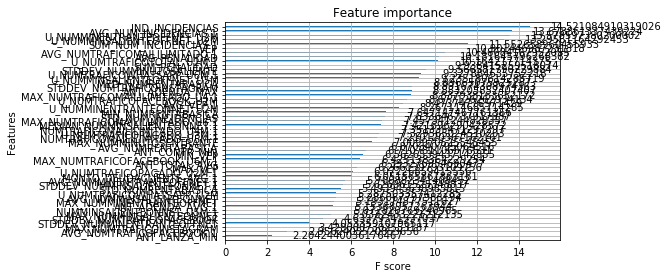

In [115]:
# Podemos calcular la importancia de variables por Xgboost
xgb.plot_importance(xgb_fit,importance_type='gain')

#### LigtGBM 

In [117]:
!pip install lightgbm

In [126]:
y_balanced

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
23099    0
23100    0
23101    0
23102    0
23103    0
23104    0
23105    1
23106    0
23107    1
23108    0
23109    0
23110    0
23111    0
23112    0
23113    0
23114    0
23115    0
23116    1
23117    0
23118    0
23119    0
23120    0
23121    1
23122    0
23123    0
23124    0
23125    0
23126    0
23127    0
23128    0
Name: TARGET, Length: 11765, dtype: object

In [127]:
import lightgbm as lgb
dtrain = lgb.Dataset(X_balanced, label=y_balanced.astype(int))
dtest =  lgb.Dataset(X_balanced, label=y_balanced.astype(int), reference=dtrain)

In [128]:
params = {
        'task':'train', 
        'is_unbalance': False, 
        'max_dept':1,
        'max_bin': 10,  # max cantidad de cortes de una var. numerica
        'boosting_type': 'gbdt',
        'objective': 'binary',
        #'min_child_weight': 150,
        'metric': 'auc',
        #'min_data_in_leaf': 250,
        'num_leaves': 5,
        'learning_rate': 0.0001,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 10,
        #'min_data_per_group':150 ,
        'verbose': 0,
        'seed ':1234
}

In [129]:
gbm = lgb.train(params,
                dtrain,
                num_boost_round=10000,
                valid_sets=[dtrain,dtest],
                early_stopping_rounds=100)

[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: 1234
[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: 1234
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: 1234
[1]	training's auc: 0.639158	valid_1's auc: 0.639158
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.648823	valid_1's auc: 0.648823
[3]	training's auc: 0.650488	valid_1's auc: 0.650488
[4]	training's auc: 0.650399	valid_1's auc: 0.650399
[5]	training's auc: 0.650466	valid_1's auc: 0.650466
[6]	training's auc: 0.65029	valid_1's auc: 0.65029
[7]	training's auc: 0.677565	valid_1's auc: 0.677565
[8]	training's auc: 0.677083	valid_1's auc: 0.677083
[9]	t

In [130]:
# Importancia de Variables
importancia=gbm.feature_importance(importance_type='gain')

def impxgb(valores,variables):
    dictimp={variables[a]:valores[a] for a in range(0,len(variables)) }
    xgimp=sorted(list(dictimp.items()), key=lambda x: x[1],reverse=True)

    return xgimp

ixg=impxgb(importancia,X_balanced.columns)
pd.Series(ixg)

0            (SUM_NUM_INCIDENCIAS.1, 3417.644187927246)
1           (AVG_NUM_INCIDENCIAS.1, 3321.6330070495605)
2      (U_NUMMINSALIENTEOFFNET_U2M, 2746.0232887268066)
3                             (VEP, 2665.9723052978516)
4                  (IND_INCIDENCIAS, 1033.760898590088)
5         (STDDEV_NUMMINUTOSALIENTE, 804.8619918823242)
6         (U_NUMTRAFICOFACEBOOK_U2M, 579.8517074584961)
7                   (ANT_ADENDA_MAX, 549.4726982116699)
8       (U_NUMMINSALIENTEOFFNET_U5M, 434.6054992675781)
9             (STD_NUM_INCIDENCIAS, 422.45600509643555)
10                        (MIN_VEP, 419.75679779052734)
11    (NUMTRAFICOMAILILIMITADO_U4M.1, 354.1319007873...
12                         (MAX_VEP, 311.5308952331543)
13      (U_NUMMINENTRANTEOFFNET_U2M, 299.7696075439453)
14                  (SUM_PENALIDAD, 213.89710235595703)
15    (MAX_NUMTRAFICOMAILILIMITADO_U4.1, 122.8292007...
16              (STD_NUMRENTABASICA, 67.96179962158203)
17        (U_NUMTRAFICOWHATSAPP_U2M, 58.64400100

#### CatBoost

In [131]:
!pip install catboost

In [132]:
from catboost import CatBoostClassifier
CatBoost=CatBoostClassifier(eval_metric="AUC",
                            one_hot_max_size=20,
                            depth=1, 
                            iterations= 800, 
                            l2_leaf_reg= 2, 
                            learning_rate= 0.0001)

In [133]:
Cat=CatBoost.fit(X_balanced, y_balanced)

0:	total: 74.5ms	remaining: 59.5s
1:	total: 81.3ms	remaining: 32.4s
2:	total: 87.6ms	remaining: 23.3s
3:	total: 93.6ms	remaining: 18.6s
4:	total: 99.6ms	remaining: 15.8s
5:	total: 106ms	remaining: 14s
6:	total: 112ms	remaining: 12.6s
7:	total: 117ms	remaining: 11.6s
8:	total: 123ms	remaining: 10.8s
9:	total: 129ms	remaining: 10.2s
10:	total: 135ms	remaining: 9.66s
11:	total: 141ms	remaining: 9.25s
12:	total: 147ms	remaining: 8.89s
13:	total: 152ms	remaining: 8.55s
14:	total: 158ms	remaining: 8.26s
15:	total: 164ms	remaining: 8.02s
16:	total: 170ms	remaining: 7.82s
17:	total: 176ms	remaining: 7.65s
18:	total: 182ms	remaining: 7.48s
19:	total: 188ms	remaining: 7.35s
20:	total: 195ms	remaining: 7.22s
21:	total: 200ms	remaining: 7.09s
22:	total: 206ms	remaining: 6.97s
23:	total: 212ms	remaining: 6.87s
24:	total: 218ms	remaining: 6.77s
25:	total: 224ms	remaining: 6.67s
26:	total: 230ms	remaining: 6.6s
27:	total: 237ms	remaining: 6.54s
28:	total: 244ms	remaining: 6.49s
29:	total: 251ms	remai

246:	total: 1.67s	remaining: 3.74s
247:	total: 1.68s	remaining: 3.73s
248:	total: 1.68s	remaining: 3.73s
249:	total: 1.69s	remaining: 3.72s
250:	total: 1.7s	remaining: 3.72s
251:	total: 1.71s	remaining: 3.71s
252:	total: 1.71s	remaining: 3.7s
253:	total: 1.72s	remaining: 3.69s
254:	total: 1.72s	remaining: 3.69s
255:	total: 1.73s	remaining: 3.68s
256:	total: 1.74s	remaining: 3.67s
257:	total: 1.74s	remaining: 3.66s
258:	total: 1.75s	remaining: 3.66s
259:	total: 1.76s	remaining: 3.65s
260:	total: 1.76s	remaining: 3.64s
261:	total: 1.77s	remaining: 3.63s
262:	total: 1.77s	remaining: 3.62s
263:	total: 1.78s	remaining: 3.62s
264:	total: 1.79s	remaining: 3.61s
265:	total: 1.79s	remaining: 3.6s
266:	total: 1.8s	remaining: 3.59s
267:	total: 1.81s	remaining: 3.59s
268:	total: 1.81s	remaining: 3.58s
269:	total: 1.82s	remaining: 3.57s
270:	total: 1.83s	remaining: 3.56s
271:	total: 1.83s	remaining: 3.56s
272:	total: 1.84s	remaining: 3.55s
273:	total: 1.84s	remaining: 3.54s
274:	total: 1.85s	remain

493:	total: 3.26s	remaining: 2.02s
494:	total: 3.27s	remaining: 2.01s
495:	total: 3.27s	remaining: 2.01s
496:	total: 3.28s	remaining: 2s
497:	total: 3.29s	remaining: 1.99s
498:	total: 3.29s	remaining: 1.99s
499:	total: 3.3s	remaining: 1.98s
500:	total: 3.3s	remaining: 1.97s
501:	total: 3.31s	remaining: 1.97s
502:	total: 3.32s	remaining: 1.96s
503:	total: 3.33s	remaining: 1.95s
504:	total: 3.33s	remaining: 1.95s
505:	total: 3.34s	remaining: 1.94s
506:	total: 3.35s	remaining: 1.93s
507:	total: 3.35s	remaining: 1.93s
508:	total: 3.36s	remaining: 1.92s
509:	total: 3.37s	remaining: 1.91s
510:	total: 3.37s	remaining: 1.91s
511:	total: 3.38s	remaining: 1.9s
512:	total: 3.38s	remaining: 1.89s
513:	total: 3.39s	remaining: 1.89s
514:	total: 3.4s	remaining: 1.88s
515:	total: 3.4s	remaining: 1.87s
516:	total: 3.41s	remaining: 1.87s
517:	total: 3.42s	remaining: 1.86s
518:	total: 3.42s	remaining: 1.85s
519:	total: 3.43s	remaining: 1.85s
520:	total: 3.44s	remaining: 1.84s
521:	total: 3.44s	remaining:

743:	total: 4.85s	remaining: 365ms
744:	total: 4.86s	remaining: 359ms
745:	total: 4.87s	remaining: 352ms
746:	total: 4.87s	remaining: 346ms
747:	total: 4.88s	remaining: 339ms
748:	total: 4.89s	remaining: 333ms
749:	total: 4.89s	remaining: 326ms
750:	total: 4.9s	remaining: 320ms
751:	total: 4.91s	remaining: 313ms
752:	total: 4.91s	remaining: 307ms
753:	total: 4.92s	remaining: 300ms
754:	total: 4.93s	remaining: 294ms
755:	total: 4.93s	remaining: 287ms
756:	total: 4.94s	remaining: 281ms
757:	total: 4.95s	remaining: 274ms
758:	total: 4.95s	remaining: 267ms
759:	total: 4.96s	remaining: 261ms
760:	total: 4.96s	remaining: 254ms
761:	total: 4.97s	remaining: 248ms
762:	total: 4.98s	remaining: 241ms
763:	total: 4.98s	remaining: 235ms
764:	total: 4.99s	remaining: 228ms
765:	total: 5s	remaining: 222ms
766:	total: 5s	remaining: 215ms
767:	total: 5.01s	remaining: 209ms
768:	total: 5.01s	remaining: 202ms
769:	total: 5.02s	remaining: 196ms
770:	total: 5.03s	remaining: 189ms
771:	total: 5.03s	remaining

In [134]:
y_pred_train=Cat.predict(X_train)